# Obtaining and Using MIRI Calibration Reference Files

MIRI calibration reference files can be fetched from the CDP repository at Leuven and returned as a data model object using the CDP fetching utility, which may be imported from the MIRI data models package like this:

In [1]:
from miri.datamodels.cdplib import get_cdp

The full get_cdp function reference looks like this:

get_cdp(
    cdptype,        # Type of calibration data product required (e.g. 'GAIN', 'FLAT', etc...
    detector,       # MIRI detector to be matched ('MIRIMAGE', 'MIIFUSHORT' or 'MIRIFULONG').
    model,          # Model number to be matched (default 'FM').
    readpatt,       # Detector readout pattern to be matched (default match any).
    channel,        # Channel to be matched (default match any).
    band,           # Band to be matched (default match any).
    mirifilter,     # Filter to be matched (default match any).
    subarray,       # Subarray to be matched (default match FULL frame).
    integration,    # Integration number to be matched (valid for 'DARK' only).
    cdprelease,     # CDP release number to match, if any.
    cddversion,     # CDP version number to match, if any.
    cdpsubversion,  # CDP subversion number to match, if any.
    
    ftp_host,       # Name of SFTP host (defaults to Leuven server).
    ftp_path,       # Path to FTP folder (defauls to standard MIRI CDP location).
    ftp_user,       # Username to be used (if not 'miri')
    ftp_passwd,     # Passowrd to be used. If not specified a password will be prompted for.
    timeout,        # Override the default connection timeout (in seconds).
    local_path,     # Override the local file path specified in the environment variables
    cdp_env_name, miri_env_name, # Environment variables giving the local file path for CDP files.
    logger,         # Override the default Python logger
    fail_message    # Set False to suppress the logging of error messages
    )
    
    In practice, you only need to provide the parameters which are relevant. The following Pythin code
    will fetch the most recent SLOW-mode pixel flat-field CDP for the MIRI imager from the Leuven repository and return it
    as a data model.

In [3]:
cdpmodel = get_cdp( "FLAT", detector="MIRIMAGE", readpatt='SLOW' )

INFO:miri.cdplib.get_cdp:Reading 'FLAT' model from '/sw4/smb/MIRI/MIRI_FM_MIRIMAGE_SLOW_FULL_FLAT_06.01.00.fits'


Once the CDP has been fetched, all the data model query and display functions become available.

In [4]:
print( cdpmodel.info )

MiriFlatfieldModel: 
Metadata
--------
Data model location                    FITS key   Value                  Comment
~~~~~~~~~~~~~~~~~~~                    ~~~~~~~~   ~~~~~                  ~~~~~~~
meta.author                          | AUTHOR   = Oers Hunor Detre, detre@mpia.de / Author of the reference file
meta.date                            | DATE     = 2016-06-23T12:45:07.280669 / Date this file was created (UTC)
meta.description                     | DESCRIP  = This is a combined (SKY*PIXEL) imager flat field for filter: ANY / Description of the reference file
meta.exposure.nframes                | NFRAMES  = 1                    / Number of frames coadded in a group
meta.exposure.readpatt               | READPATT = SLOW                 / Readout pattern
meta.exposure.type                   | EXP_TYPE = MIR_FLAT-IMAGE       / Type of data in the exposure
meta.filename                        | FILENAME = MIRI_FM_MIRIMAGE_SLOW_FULL_FLAT_06.01.00.fits / Name of the file
meta.fil

In [5]:
print( cdpmodel.summary )

/sw4/smb/anaconda3/envs/miricle.devel/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


MiriFlatfieldModel: 
3 data arrays:
--------------
Data array 'data' (1024 x 1032) - masked array
  zero=0, non-zero=1056768; min=nan, max=nan, mean=nan, median=nan, std=nan
Data array 'dq' (1024 x 1032)
  zero=752239, non-zero=304529; min=0.000000, max=66.000000, mean=19.009325, median=0.000000, std=29.876865
Data array 'err' (1024 x 1032) - masked array
  zero=0, non-zero=1056768; min=0.000004, max=inf, mean=inf, median=0.000009, std=nan

Plus one data table:
--------------------
Data table 'dq_def'
  Columns: 'BIT', 'VALUE', 'NAME', 'DESCRIPTION'



/sw4/smb/anaconda3/envs/miricle.devel/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


NOTE: If the above code generates warnings it is because not all of the statistics requested can be calculated. Some of the results could be "infinity" or "not a number".

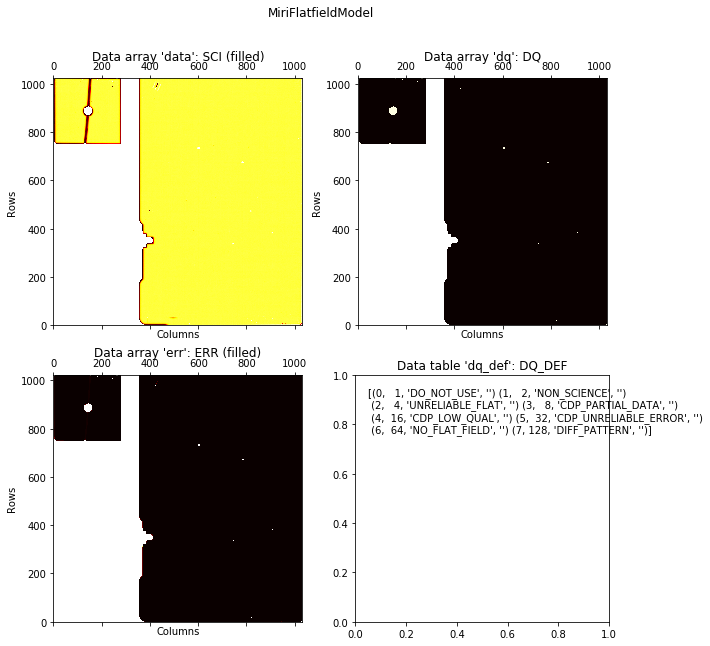

In [6]:
cdpmodel.plot()

The data contained in each data model can be extracted from its hierarchical location. For example,
the main data array (SCI) may be found here.

In [7]:
print( cdpmodel.data )

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [8]:
print( cdpmodel.err )

[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]


In [9]:
print( cdpmodel.dq )

[[66 66 66 ... 66 66 66]
 [66 66 66 ... 66 66 66]
 [66 66 66 ... 66 66 66]
 ...
 [66 66 66 ... 66 66 66]
 [66 66 66 ... 66 66 66]
 [66 66 66 ... 66 66 66]]


You might need to slice the array to skip the masked areas. (N.B. the cdpmodel.dq array indicates which parts of the array are masked.) For example...

In [10]:
print( cdpmodel.data[600:620, 600:620])

[[0.9990627  0.9987409  1.0039232  1.0025953  0.99749786 1.0038625
  1.0044767  1.0033804  1.0003942  1.0020802  0.9947663  0.99832314
  1.0004383  1.0042543  0.9962805  0.99969095 1.0006784  0.9953506
  1.0015944  1.0029885 ]
 [0.99394363 0.99383134 1.0004423  1.0013345  0.99570125 0.9985268
  0.9967543  0.9967183  1.0000167  0.99536234 1.0036734  0.99519354
  1.0000376  0.9981193  1.0040219  0.9949701  1.0029391  0.9988592
  1.0034059  0.9954587 ]
 [0.99742824 0.99642205 1.0026382  1.0040228  1.0029652  0.99786943
  1.0054959  0.9994975  1.0035008  1.0000012  1.0005045  0.99955523
  0.99576324 0.99776244 0.99981093 1.0016384  0.99952924 1.0017991
  0.9995455  0.99994195]
 [0.99470156 0.9998855  0.9990744  1.0008863  1.0013238  0.9951643
  1.0015345  0.997104   1.0037596  0.9980453  1.0018138  0.99594104
  1.0024422  1.0031818  1.0042015  0.9978115  0.9983837  0.9972725
  0.9969099  0.99597716]
 [0.9915549  1.003084   1.0027001  1.0056071  1.0050493  0.997804
  1.0012455  0.99738616 1

In [12]:
print( cdpmodel.dq[600:620, 600:620] )

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


The MIRI simulator (MIRISIm) uses this CDP fetching function to obtain the calibration data it needs. See

http://miri.ster.kuleuven.be/bin/view/Internal/Software/MIRISim

for further information.